<div style="text-align: center;">

<img src="LMS Logo (1).png" alt="TIET Logo" style="width: 200px;">

#### Thapar Institute of Engineering and Technology, Patiala <br><br> Computer Science & Engineering Department  
---
#### ***UCS420: Cognitive Computing <br> <br> Lab Assignment-8 : Logistic Regression on the Iris Dataset***
---
#### *Submitted by Smarth Kaushal [Roll No. 102497023] to Dr. Vaishali*

</div>

In [1]:
# Import Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn                 import datasets
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the dataset
np.set_printoptions(precision = 3)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Data Splitting (80% training data, 20% testing data)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Compute mean/std & transform training data
x_test = scaler.transform(x_test)        # Use same scaling on test data

In [3]:
# Train the Logistic Regression model
model = LogisticRegression(solver="lbfgs")
model.fit(x_train, y_train)

LogisticRegression()

In [4]:
# Predictions
y_pred = model.predict(x_test)
print(y_pred)

[0 2 1 1 0 1 2 1 1 1 0 0 2 0 2 0 1 1 2 0 2 1 2 0 2 0 0 1 0 0]


In [5]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix: 
[[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]


<Figure size 600x400 with 0 Axes>

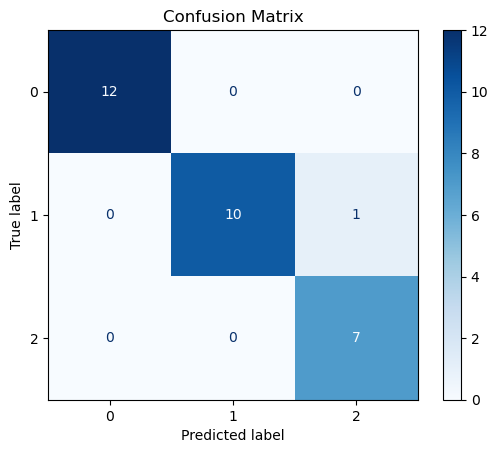

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

# Confusion Matrix Visualiztion
plt.figure(figsize = (6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix")
plt.show()

The confusion matrix provides valuable insights into the performance of the classification model by comparing predicted labels with actual labels.

#### 1️⃣ Overall Performance  
- The model demonstrates high accuracy, with the majority of predictions being correct.  
- Only one misclassification is observed, indicating that the model is performing well.

#### 2️⃣ Class-wise Analysis
- Class 0: All 12 instances were correctly classified (100% accuracy for this class).
- Class 1: Out of 11 instances, 10 were correctly classified, while 1 was misclassified as Class 2.
- Class 2: All 7 instances were correctly classified (100% accuracy for this class).

In [9]:
# Compute Cross-Entropy Loss
from sklearn.metrics import log_loss
# Get predictions (probabilities)
y_pred_probs = model.predict_proba(x_test)

# Compute Cross-Entropy Loss
loss = log_loss(y_test, y_pred_probs)
print(f"Cross-Entropy Loss on Iris Dataset: {loss:.4f}")

Cross-Entropy Loss on Iris Dataset: 0.1565


A loss of 0.1565 suggests that the model is making predictions that are fairly accurate, but there is still some room for improvement. (Loss could still be reduced by hyperparameter tuning)